# **Set Up**

In [ ]:
# @title Install Packages { run: "auto", vertical-output: true, form-width: "50%", display-mode: "form" }
!pip install isom2600 -U

  Preparing metadata (setup.py) ... done
  Created wheel for isom2600: filename=isom2600-4.0-py3-none-any.whl size=4778 sha256=676ccaa57497ea22be12dc76c05753e99663286a9e8a789a60c53a5d06f21719
  Stored in directory: /root/.cache/pip/wheels/dc/e5/40/08261a870f1c907b97ed8ce90f380ac13d2b3c99077cb7ce5a
Successfully built isom2600


In [ ]:

# @title Import Libraries { run: "auto", vertical-output: true, form-width: "50%", display-mode: "form" }
import numpy as np
import scipy as sp
import pandas as pd
import isom2600
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns

In [ ]:
import statsmodels.api as sm

The code imports the statsmodels.api module and gives it an alias of **sm**. This module provides various statistical models and functions that can be used for statistical analysis and inference, including linear regression, time-series analysis, and more. By importing this module and giving it an alias, the user can use the functions and models provided by the module using the shorthand sm.

# **Part 1 Data**

In [ ]:
returns = isom2600.data.returnsp500_tesla()
returns.head()

,SP500,Tesla
Date,,
2021-01-04,-0.014755,0.034152
2021-01-05,0.007083,0.007317
2021-01-06,0.005710,0.028390
2021-01-07,0.014847,0.079447
2021-01-08,0.005492,0.078403


In [ ]:
returns.index

DatetimeIndex(['2021-01-04', '2021-01-05', '2021-01-06', '2021-01-07',
               '2021-01-08', '2021-01-11', '2021-01-12', '2021-01-13',
               '2021-01-14', '2021-01-15',
               ...
               '2021-12-17', '2021-12-20', '2021-12-21', '2021-12-22',
               '2021-12-23', '2021-12-27', '2021-12-28', '2021-12-29',
               '2021-12-30', '2021-12-31'],
              dtype='datetime64[ns]', name='Date', length=252, freq=None)

## Scatterplot

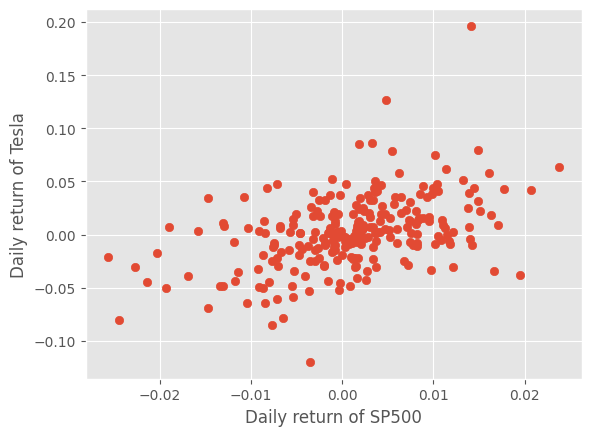

In [ ]:
plt.scatter(returns["SP500"],returns["Tesla"])
plt.xlabel("Daily return of SP500")
plt.ylabel("Daily return of Tesla")
plt.show()

This code plots a scatter plot of the daily return of the S&P 500 index on the x-axis and the daily return of Tesla stock on the y-axis. The plt.scatter() function from the matplotlib library is used to create the scatter plot, with the S&P 500 daily return data stored in the "SP500" column of the returns dataframe and the Tesla daily return data stored in the "Tesla" column. The x-axis is labeled "Daily return of SP500" using the plt.xlabel() function, and the y-axis is labeled "Daily return of Tesla" using the plt.ylabel() function. Finally, the plt.show() function is called to display the plot.

## **Correlation**

In [ ]:
returns.corr() # correlation matrix

,SP500,Tesla
SP500,1.000000,0.448253
Tesla,0.448253,1.000000


In [ ]:
print(returns.corr().iloc[0,1])
# iloc to select data using row and column numbers
# select numbers from the first row (0) and second column(1)

0.4482531598601673


In [ ]:
print(returns.corr().loc["SP500", "Tesla"])
# loc : select data using index name("SP500") and column name ("Tela")

0.4482531598601673


This code returns the correlation coefficient between the columns "SP500" and "Tesla" of the dataframe "returns".

returns.corr() computes the correlation matrix of the dataframe returns, which contains the daily returns of several assets. The correlation matrix shows how pairs of assets are related to each other, with values ranging from -1 to 1. A correlation coefficient of 1 indicates a perfect positive correlation, a coefficient of -1 indicates a perfect negative correlation, and a coefficient of 0 indicates no correlation between the two variables.

# **Part 2 Single-Index Model (SIM)**
---

In [ ]:
returns.head()

,SP500,Tesla
Date,,
2021-01-04,-0.014755,0.034152
2021-01-05,0.007083,0.007317
2021-01-06,0.005710,0.028390
2021-01-07,0.014847,0.079447
2021-01-08,0.005492,0.078403


## Train and Test Split

In [ ]:
trainsize = int(len(returns)*0.8)
train = returns.iloc[:trainsize]
test = returns.iloc[trainsize:]
print("No of examples in train: ", train.shape)
print("No of examples in test: ", test.shape)

No of examples in train:  (201, 2)
No of examples in test:  (51, 2)


*   We will only use train data to build model (fit model,estimate $\beta_0,\beta_1$),
*   We will evaluate the performance of this model for both train and test data (Should not build another model in test data)

## **Build model with Statsmodels**
---

### Model Without Intercept

In [ ]:
modelno = sm.OLS(train['Tesla'], train['SP500']).fit()
# without add constant, force b0=0
print(modelno.summary())

                                 OLS Regression Results                                
Dep. Variable:                  Tesla   R-squared (uncentered):                   0.207
Model:                            OLS   Adj. R-squared (uncentered):              0.203
Method:                 Least Squares   F-statistic:                              52.08
Date:                Mon, 21 Apr 2025   Prob (F-statistic):                    1.08e-11
Time:                        07:53:02   Log-Likelihood:                          428.03
No. Observations:                 201   AIC:                                     -854.1
Df Residuals:                     200   BIC:                                     -850.7
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

$$R=1.8042R_m+\epsilon$$

### Model With Intercept

In [ ]:
train['SP500'].head()

,SP500
Date,
2021-01-04,-0.014755
2021-01-05,0.007083
2021-01-06,0.005710
2021-01-07,0.014847
2021-01-08,0.005492


In [ ]:
sm.add_constant(train['SP500']).head() # add a column with constant 1

,const,SP500
Date,,
2021-01-04,1.0,-0.014755
2021-01-05,1.0,0.007083
2021-01-06,1.0,0.005710
2021-01-07,1.0,0.014847
2021-01-08,1.0,0.005492


In [ ]:
model = sm.OLS(train['Tesla'], sm.add_constant(train['SP500'])).fit()
# fit model = build model = estimate intercept and slope
# OLS: ordinary least square estimation: a method to estimate intercept and slope so that the prediction error can be minimized
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Tesla   R-squared:                       0.205
Model:                            OLS   Adj. R-squared:                  0.201
Method:                 Least Squares   F-statistic:                     51.28
Date:                Mon, 21 Apr 2025   Prob (F-statistic):           1.52e-11
Time:                        07:54:24   Log-Likelihood:                 428.03
No. Observations:                 201   AIC:                            -852.1
Df Residuals:                     199   BIC:                            -845.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0002      0.002     -0.099      0.9

$$
R=-0.0002+1.8071 R_m+\epsilon
$$

This code performs a linear regression analysis between the daily return of Tesla stock (dependent variable) and the daily return of S&P 500 index (independent variable) using Ordinary Least Squares (OLS) method from the statsmodels library.

- sm.OLS creates an instance of the OLS regression model and takes two arguments:

    - The first argument is the dependent variable which is a Pandas Series of values we want to predict (in this case, returns['Tesla']).
    - The second argument is the independent variable which is a Pandas Series of predictor values (in this case, returns['SP500']).
sm.add_constant adds a constant term to the independent variable. This is done because OLS regression requires a constant term in order to provide accurate results.

- The .fit() method fits the regression model to the data and returns an OLSRegressionResults object.
- The .summary() method is used to print the summary statistics of the model including coefficients, standard errors, R-squared, F-statistic, and other diagnostic statistics.

## **Prediction**


---



### Predict a single response variable for a x value

In [ ]:
model.predict([1, 0.05])

array([0.0901522])

This will return the predicted value of the response variable (Tesla) for the input feature (SP500=0.05), based on the fitted linear regression model.

predict() can be used for both training and new data

### Predict for all in training set

In [ ]:
yhat = model.predict(sm.add_constant(train['SP500']))

In [ ]:
# alternatively, model object has the attribute: fittedvalues == yhat
model.fittedvalues

,0
Date,
2021-01-04,-0.026867
2021-01-05,0.012595
2021-01-06,0.010115
2021-01-07,0.026627
2021-01-08,0.009721
...,...
2021-10-13,0.005258
2021-10-14,0.030631
2021-10-15,0.013278


In [ ]:
train['Tesla_Pred'] = model.fittedvalues # it is equalent to yhat
train

,SP500,Tesla,Tesla_Pred
Date,,,
2021-01-04,-0.014755,0.034152,-0.026867
2021-01-05,0.007083,0.007317,0.012595
2021-01-06,0.005710,0.028390,0.010115
2021-01-07,0.014847,0.079447,0.026627
2021-01-08,0.005492,0.078403,0.009721
...,...,...,...
2021-10-13,0.003023,0.006652,0.005258
2021-10-14,0.017063,0.008926,0.030631
2021-10-15,0.007460,0.030196,0.013278


This will return the predicted values  of the response variable (Tesla) for all SP500 returns from train data.

## **Residual**

In [ ]:
residuals = model.resid
train['Residuals'] = residuals
train.head()

,SP500,Tesla,Tesla_Pred,Residuals
Date,,,,
2021-01-04,-0.014755,0.034152,-0.026867,0.061019
2021-01-05,0.007083,0.007317,0.012595,-0.005278
2021-01-06,0.005710,0.028390,0.010115,0.018275
2021-01-07,0.014847,0.079447,0.026627,0.052819
2021-01-08,0.005492,0.078403,0.009721,0.068682


In [ ]:
#train['Tesla'] - train['Tesla_Pred'] == train['Residuals']

## **Rsuqare**


---



In [ ]:
r_squared = model.rsquared
print(r_squared)

0.20489272018556537


### **Extra: calculate by hand**

In [ ]:
y = train['Tesla'] # observed value
yhat = model.predict(sm.add_constant(train["SP500"]))# predicted value
ybar = train['Tesla'].mean() # average return (predicted value without model)
SST = ((y-ybar)**2).sum() # SST: total sum of squares
SSE = ((y-yhat)**2).sum() # SSE: error sum of sqaures
SSR = SST-SSE # SSR: regression sum of squares
print(SSR/SST)

0.20489272018556542


* SST (total sum of squares) is the total
variation in the dependent variable (y), and is calculated as the sum of squares of the difference between the dependent variable and its mean (ybar).

* SSR (regression sum of squares) is the explained variation in the dependent variable, and is calculated as the sum of squares of the difference between the predicted values (yhat) and the mean (ybar).

* SSE (error sum of squares) is the unexplained variation in the dependent variable, and is calculated as the sum of squares of the difference between the dependent variable and the predicted values (yhat).

In the given code, SST, SSR, and SSE are calculated for the linear regression model between daily returns of Tesla and daily returns of SP500.

In [ ]:
print(1 - SSE/SST) # same result

0.20489272018556537



*   The R-squared value is a statistical measure that represents the proportion of the variance for a dependent variable that's explained by an independent variable or variables in a regression model.

*   In other words, it is the proportion of the total variation of the dependent variable (y) that can be explained by the independent variable (x).
* It ranges from 0 to 1, where 0 indicates that the model doesn't explain the variability of the response data around its mean, and 1 indicates that the model perfectly explains the variability of the response data around its mean.

In the above code, we calculated the SST (total sum of squares), SSE (sum of squared errors) and SSR (sum of squared regression). We then used these values to calculate the R-squared value as SSR/SST.

## **MSE and RMSE**


---



### Performance in Training Set

In [ ]:
mse = model.mse_resid
print(mse)

0.0008359973379095491


model.mse_resid gives you the Mean Squared Error (MSE) of the residuals — that is, the average of the squared differences between the observed values and the values predicted by your regression model on the training data.

Smaller MSE means better fit (on the training set).



In [ ]:
rmse = np.sqrt(mse)
print(rmse)

0.028913618554403546


### Extra: calculate by hand

In [ ]:
MSE = SSE/(len(train['Tesla'])-2) # mean Square of error
RMSE = (MSE)**0.5 # root of mean square of error
print(MSE, RMSE)

0.0008359973379095491 0.028913618554403546


The code calculates the Mean Squared Error (MSE) and the Root Mean Squared Error (RMSE) of the regression model.

The MSE is calculated by dividing the SSR (Sum of Squares due to Regression) by the degrees of freedom (n - p - 1), where n is the number of observations and p is the number of predictors.

The RMSE is the square root of the MSE.

The purpose of calculating the MSE and RMSE is to measure how well a model's predictions match the actual observed values. A lower MSE and RMSE indicate a better fit.

### Performance in Testing Set (calculate by hands)

In [ ]:
yhat_test = model.predict(sm.add_constant(test["SP500"]))
test['Tesla_Pred'] = yhat_test

In [ ]:
SSE_test = ((test['Tesla'] - yhat_test)**2).sum()
mse_test = SSE_test/(len(test['Tesla'])-2)
rmse_test = np.sqrt(mse_test)

Compare the performance in testing set and training set

In [ ]:
print("MSE is ", mse, " in Training Set" )
print("MSE is ", mse_test, " in Testing Set")

MSE is  0.0008359973379095491  in Training Set
MSE is  0.001478650217866868  in Testing Set


In [ ]:
print("RMSe is ",rmse, " in Training Set" )
print("RMSE is ", rmse_test, " in Testing Set")

RMSe is  0.028913618554403546  in Training Set
RMSE is  0.03845322116373176  in Testing Set


## **Residual Analysis: four-in-one plot**
---

**isom2600.regression.residual_plot(model):** return the normal QQ plot, histogram, time series plot of residual and scatter of residual versus fitted values.
- Input
    - model: Fitted regression model used to calculate fitted values
- Output
    - A four-in-one residual plot

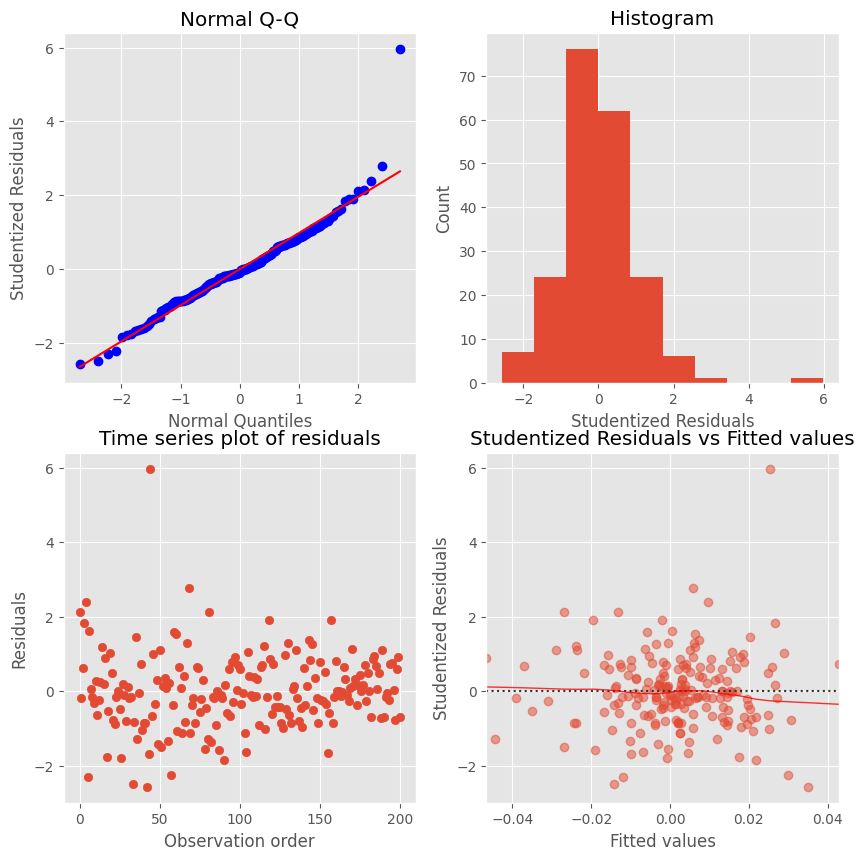

In [ ]:
isom2600.regression.residual_plot(model)